# 1. Aplicaciones de K-means

## 1.0 Image quantization

La cuantización de imágenes es un ***método de compresión con pérdida*** que reemplaza un rango de colores similares en una imagen con un solo color. La cuantización reduce el tamaño del archivo de imagen ya que se requieren menos bits para representar los colores.

 En el siguiente ejemplo, utilizaremos la agrupación para descubrir una paleta comprimida para una imagen que contiene sus colores más importantes. Luego reconstruiremos la imagen usando la paleta comprimida.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving holi.jpg to holi.jpg


In [2]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import shuffle

a = mpimg.imread('holi.jpg')

original_img = np.array(a, dtype=np.float64) / 255

original_dimensions = tuple(original_img.shape)
width, height, depth = tuple(original_img.shape)

#Re-dimencionamos la imagen de entrada
image_flattened = np.reshape(original_img, (width * height, depth))
print(original_dimensions)
print(width, height, depth)

#Una vez re-dimensionada la imagen seleccionamos de manera aleatoria 1000 pixeles
image_array_sample = shuffle(image_flattened, random_state=0)[0:1000]

#Con estos 1000 pixeles hacemos k-means de 64 clusters
estimator = KMeans(n_clusters=64, random_state=0)
estimator.fit(image_array_sample)


#La paleta comprimida es de dimesion 64
cluster_assignments = estimator.predict(image_flattened)
compressed_palette = estimator.cluster_centers_
print(compressed_palette.shape)

compressed_img = np.zeros((width, height, compressed_palette.shape[1]))
label_idx = 0

(359, 640, 3)
359 640 3
(64, 3)


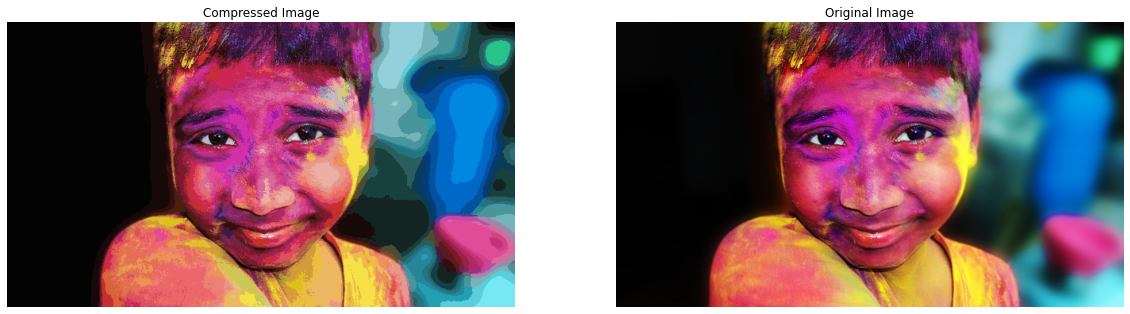

In [3]:
for i in range(width):
  for j in range(height):
    compressed_img[i][j] = compressed_palette[cluster_assignments[label_idx]]
    label_idx += 1

plt.figure(figsize=(20,60))
plt.subplot(122)
plt.title('Original Image')
plt.imshow(original_img)
plt.axis('off')
plt.subplot(121)
plt.title('Compressed Image')
plt.imshow(compressed_img)
plt.axis('off')
plt.show()

## 1.1 Clasificación de dígitos con k-means

cluster 0
223 elementos


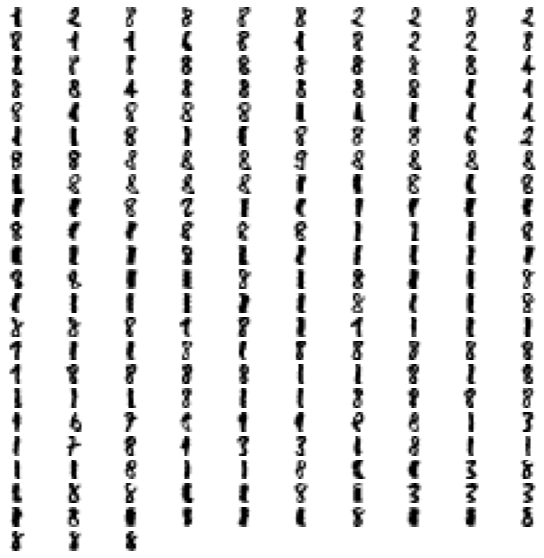

cluster 1
245 elementos


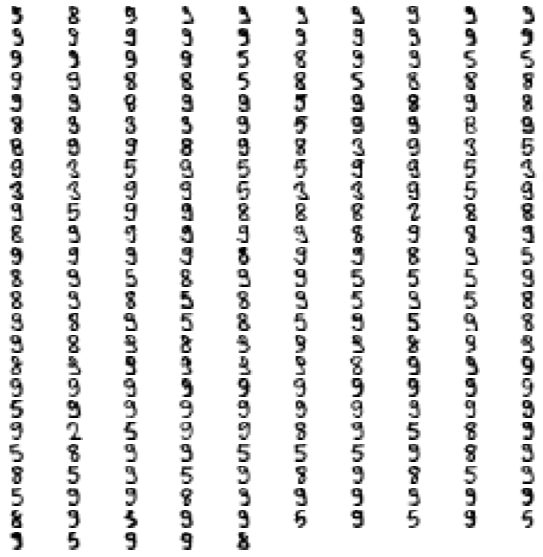

cluster 2
98 elementos


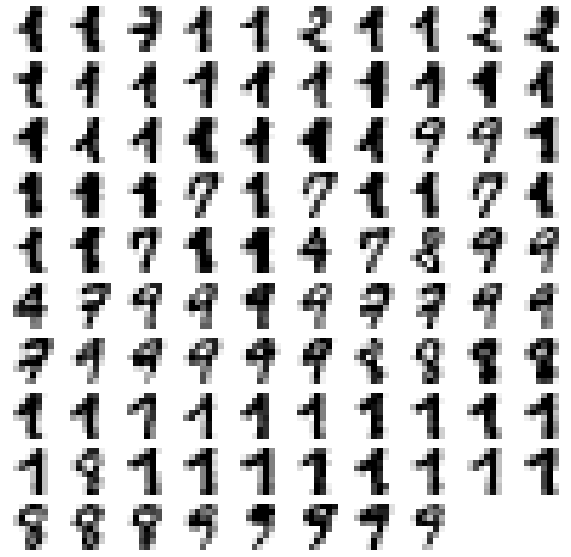

cluster 3
179 elementos


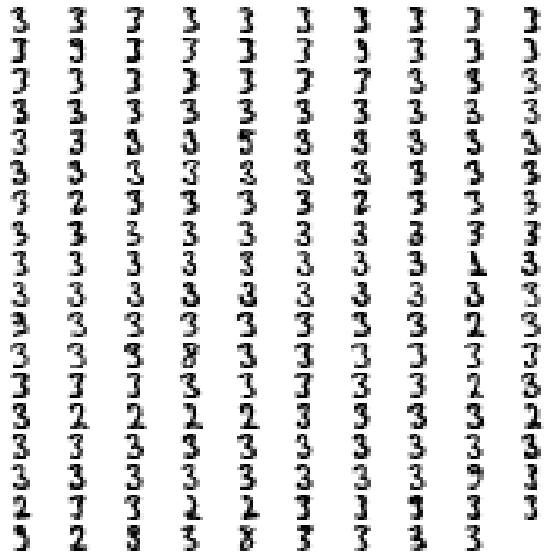

cluster 4
170 elementos


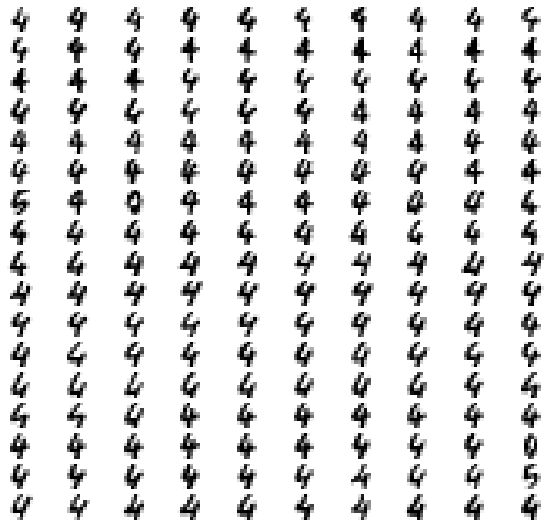

cluster 5
182 elementos


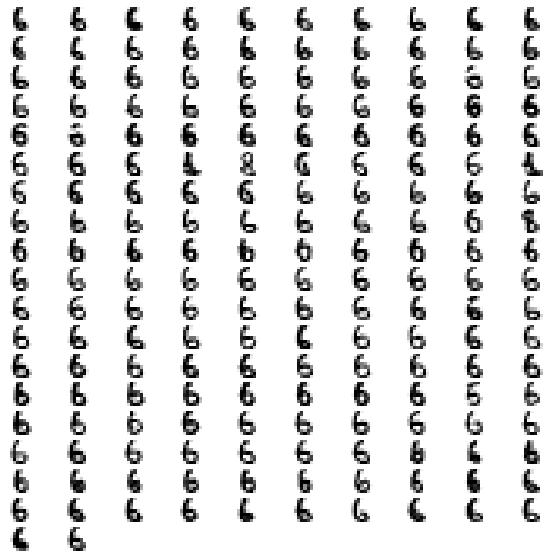

cluster 6
199 elementos


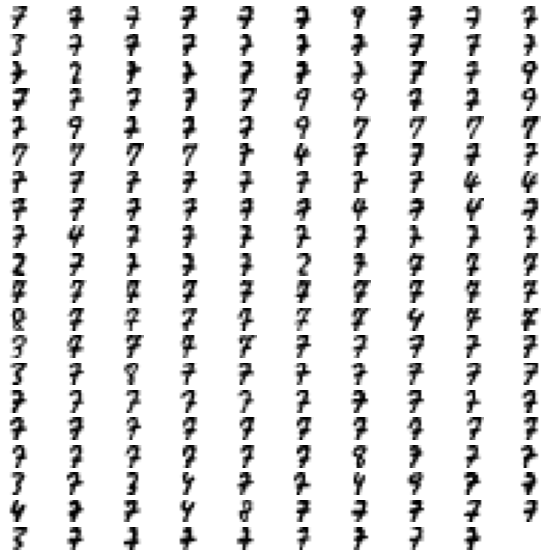

cluster 7
174 elementos


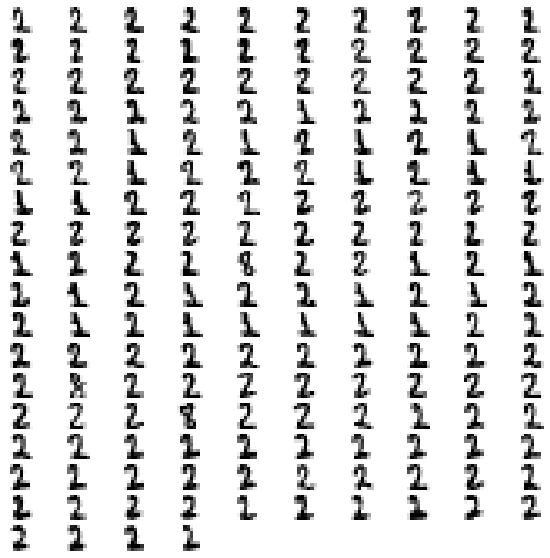

cluster 8
178 elementos


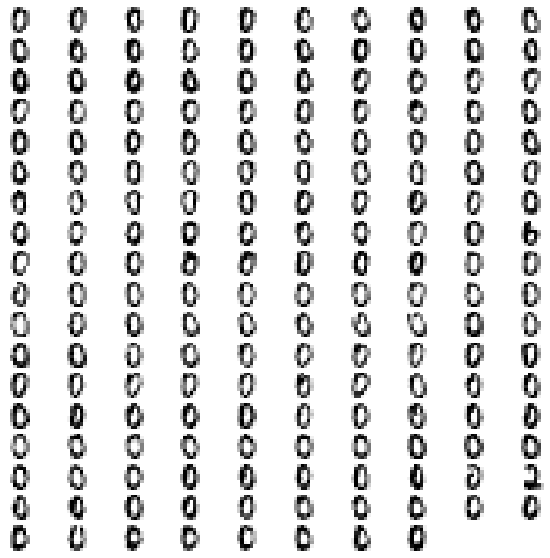

cluster 9
149 elementos


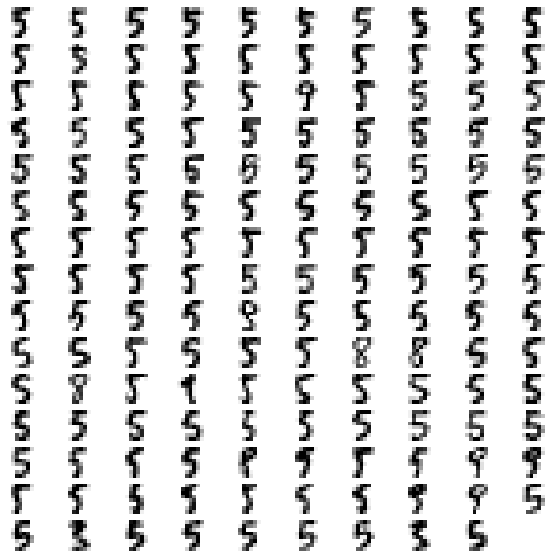

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
digits = load_digits()
data = digits.data

data = 255-data
np.random.seed(1)
n = 10

kmeans = KMeans(n_clusters=n,init='random')
kmeans.fit(data)
Z = kmeans.predict(data)

for i in range(0,n):

    fila = np.where(Z==i)[0] # filas en Z donde están las imagenes de cada cluster
    num = fila.shape[0]      # numero imagenes de cada cluster
    r = np.floor(num/10.)    # numero de filas menos 1 en figura de salida 

    print("cluster "+str(i))
    print(str(num)+" elementos")

    plt.figure(figsize=(10,10))
    for k in range(0, num):
        plt.subplot(r+1, 10, k+1)
        imagen = data[fila[k], ]
        imagen = imagen.reshape(8, 8)
        plt.imshow(imagen, cmap=plt.cm.gray)
        plt.axis('off')
    plt.show()



## 1.2 Segmentación de imágenes con k-means

In [5]:
from google.colab import files
uploaded = files.upload()

Saving Lago_Victoria.jpg to Lago_Victoria.jpg


In [0]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

I = mpimg.imread('Lago_Victoria.jpg')

plt.figure(figsize=(8,8))
plt.imshow(I)
plt.axis('off')
plt.show()

I1 = I.convert('L')
I2 = np.asarray(I1,dtype=np.float)

plt.figure(figsize=(8,8))
plt.imshow(I2,cmap='gray')
plt.axis('off')
plt.show()


X = I2.reshape((-1, 1))

k_means = KMeans(n_clusters=3)
k_means.fit(X) 


centroides = k_means.cluster_centers_
etiquetas = k_means.labels_

I2_compressed = np.choose(etiquetas, centroides)
I2_compressed.shape = I2.shape


In [0]:
plt.figure(figsize=(8,8))
plt.imshow(I2_compressed,cmap='gray')
plt.axis('off')
plt.show()


# 2. Bisecting K-means

***Algoritmo***

1. Aplique k-means al conjunto de datos completo estableciendo k = 2.
2. Vea si ha alcanzado el número deseado de clúster, si es así, deténgase, de lo contrario, aplique k-means con k = 2 a uno de los clústeres obtenidos del paso anterior.
3. Repetimos el paso 2 hasta que se alcancen los criterios de convergencia.


Estos son algunos de los métodos que puede seguir para elegir en qué clúster dividir a continuación: 
* Dividir el clúster que tiene más número de elementos.
* Dividir el clúster que tiene más varianza respecto a sus centroide.

# 3. Tarea 5

El siguiente dataset , esta formado por 4 grupos se pide:
* Implementar el algoritmo ***Bisecting K-means***.
* Evalue el clusters con ***silhouette coefficient***.

Ejemplo.

Supongamos que tenemos 4 grupos ( A, B ,C ,D ).

***Paso 1:***

Cluster 1 (A,B)

Cluster 2 (C,D)

***Paso 2:***

Clúster 1: A, B

Teniendo en cuenta que dividiremos el Clúster 2 ; digamos 3, 4

Clúster 3: C

Clúster 4: D

Entonces los grupos que quedarian ( 1,3,4 )

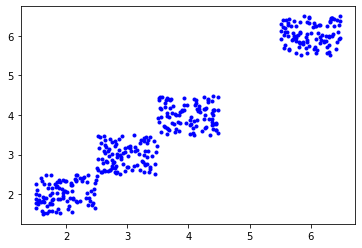

In [9]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

#Numero de datos por cluster
N_datos=100

cluster1 = np.random.uniform(1.5, 2.5, (2, N_datos))
cluster2 = np.random.uniform(3.5, 4.5, (2, N_datos))
cluster3 = np.random.uniform(2.5, 3.5, (2, N_datos))
cluster4 = np.random.uniform(5.5, 6.5, (2, N_datos))

plt.plot(cluster1[0], cluster1[1], 'b.')
plt.plot(cluster2[0], cluster2[1], 'b.')
plt.plot(cluster3[0], cluster3[1], 'b.')
plt.plot(cluster4[0], cluster4[1], 'b.')